Made by:
*   19CS10039: Kaushal Banthia
*   19CS10073: Rajat Bachhawat

# Importing Libraries

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data and preprocessing it so that it can be used by PyTorch

In [ ]:
# Importing the train and the test datasets
train_data = pd.read_csv("optdigits_tra.csv", header = None)
test_data = pd.read_csv("optdigits_tes.csv", header = None)

In [ ]:
# Normalizing the data
X_train = np.array(train_data.drop(64, axis = 1)/16)
X_test = np.array(test_data.drop(64, axis = 1)/16)

y_train = np.array(train_data[64])
y_test = np.array(test_data[64])

In [ ]:
# Making the dataset compatible from PyTorch
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# Create feature and targets tensor for test set.
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Setting the batch size
batch_size = 100

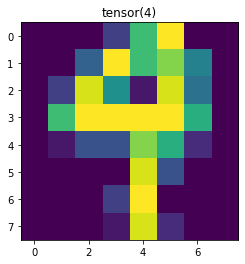

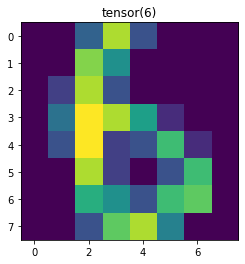

In [ ]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(X_train, y_train)
test = torch.utils.data.TensorDataset(X_test, y_test)

# Data Loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# Visualize one of the images in the train data set
plt.imshow(X_train[3].reshape(8,8))
plt.title(str(y_train[3]))
plt.show()

plt.imshow(X_train[4].reshape(8,8))
plt.title(str(y_train[4]))
plt.show()

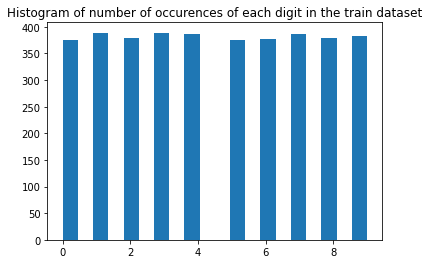

In [ ]:
plt.title("Histogram of number of occurences of each digit in the train dataset")
plt.hist(train_data[64], bins = 20)
plt.show()

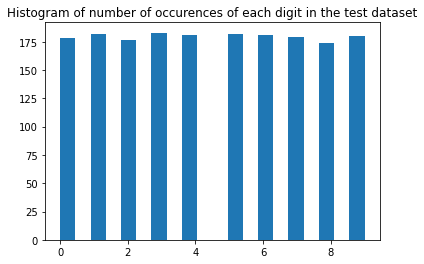

In [ ]:
plt.title("Histogram of number of occurences of each digit in the test dataset")
plt.hist(test_data[64], bins = 20)
plt.show()

# (1, 2, 3, 4) Implemenation and Training of the Model begins 

## Defining the 3 types of models

In [ ]:
# Create ANN Model with 0 hidden layers
class ANN_0_layers(nn.Module):
    def __init__(self, input_dim, output_dim):
        '''
        Initialise the Neural Network with 0 hidden layers
        
        Parameters: input_dim - Input Dimension of the Neural Network
                    output_dim - Output Dimension of the Neural Network
        '''
        super(ANN_0_layers, self).__init__()
        self.fc1 = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        '''
        Does the forward propagation for the model
        
        Parameters: x - The dataset
        '''
        out = self.fc1(x)
        return out

In [ ]:
# Create ANN Model with 1 hidden layer
class ANN_1_layer(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        Initialise the Neural Network with 1 hidden layer
        
        Parameters: input_dim - Input Dimension of the Neural Network
                    hidden_dim - Dimension of the hidden layer
                    output_dim - Output Dimension of the Neural Network
        '''
        super(ANN_1_layer, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        '''
        Does the forward propagation for the model
        
        Parameters: x - The dataset
        '''
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [ ]:
# Create ANN Model with 2 hidden layers
class ANN_2_layers(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        '''
        Initialise the Neural Network with 2 hidden layers
        
        Parameters: input_dim - Input Dimension of the Neural Network
                    hidden_dim - Array containing the dimensions of the 2 hidden layers
                    output_dim - Output Dimension of the Neural Network
        '''
        super(ANN_2_layers, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0]) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(input_dim, hidden_dims[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dims[1], output_dim)  
    
    def forward(self, x):
        '''
        Does the forward propagation for the model
        
        Parameters: x - The dataset
        '''
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(x)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

## Setting the hyperparameters

In [ ]:
# epoch and iteration
n_iters = 50000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

# dimensions
input_dim = 8*8
output_dim = 10

learning_rates = [10, 1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

## Helper functions

In [ ]:
def get_lr(optimizer):
    '''
    Returns the learning rate of the optimizer
    
    Parameters: optimizer: The optimizer used for the model
    Returns: The learning rate of the optimizer
    '''
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
def train_model(model, optimizer, input_dim, train_loader, test_loader):
    '''
    Trains the model
    
    Parameters: model - The neural network model
                optimizer - The optimizer used for the model
                input_dim - The input dimensions for the neural network
                train_loader - Data loader for the train dataset
                test_loader - Data loader for the test dataset
    Returns: final_predicted - Array of the final predictions
             iteration_list - Array of the number of iterations per 50 iterations
             loss_list - Array of the loss of the model 50 iterations
             accuracy_list - Array of the accuracy of the model 50 iterations
    '''
    count = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    final_predicted = []

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            train = Variable(images.view(-1, input_dim))
            labels = Variable(labels)
            optimizer.zero_grad() # Clear gradients
            outputs = model(train) # Forward propagation
            loss = error(outputs, labels) # Calculate softmax and cross entropy loss
            loss.backward() # Calculating gradients
            optimizer.step() # Update parameters

            count += 1

            if count % 50 == 0:
                # Calculate Accuracy         
                correct = 0
                total = 0
                final_predicted = []
                # Predict test dataset
                for images, labels in test_loader:
                    test = Variable(images.view(-1, input_dim))
                    outputs = model(test) # Forward propagation
                    predicted = torch.max(outputs.data, 1)[1] # Get predictions from the maximum value
                    final_predicted.append(predicted)
                    total += len(labels) # Total number of labels
                    correct += (predicted == labels).sum() # Total correct predictions
                accuracy = 100.0 * correct.item() / total

                # store loss and iteration
                loss_list.append(loss.data.item())
                iteration_list.append(count)
                accuracy_list.append(accuracy)
                if count % 10000 == 0:
                    print('Iteration: {}  Loss: {}  Accuracy: {} %  Learning Rate: {}'.format(count, loss.data.item(), accuracy, get_lr(optimizer)))
    final_predicted = np.array(np.concatenate(final_predicted).flat)
    return final_predicted, iteration_list, loss_list, accuracy_list


## (2) Implementing the model

Iteration: 10000  Loss: 0.0005436287610791624  Accuracy: 94.71341124095716 %  Learning Rate: 10
Iteration: 20000  Loss: 0.009558474645018578  Accuracy: 94.99165275459099 %  Learning Rate: 10
Iteration: 30000  Loss: 0.008700408041477203  Accuracy: 94.99165275459099 %  Learning Rate: 10
Iteration: 40000  Loss: 0.0014690753305330873  Accuracy: 94.49081803005008 %  Learning Rate: 10
Iteration: 50000  Loss: 0.0056656962260603905  Accuracy: 94.60211463550361 %  Learning Rate: 10

Iteration: 10000  Loss: 0.0046885875053703785  Accuracy: 95.21424596549805 %  Learning Rate: 1
Iteration: 20000  Loss: 0.02759530395269394  Accuracy: 95.38119087367835 %  Learning Rate: 1
Iteration: 30000  Loss: 0.030709661543369293  Accuracy: 95.54813578185865 %  Learning Rate: 1
Iteration: 40000  Loss: 0.010708046145737171  Accuracy: 95.6594323873122 %  Learning Rate: 1
Iteration: 50000  Loss: 0.023888377472758293  Accuracy: 95.49248747913188 %  Learning Rate: 1

Iteration: 10000  Loss: 0.007967042736709118  Accur

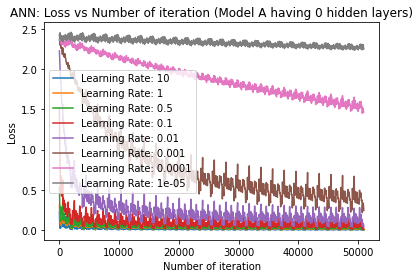

[94.37952142459655, 95.54813578185865, 95.43683917640512, 95.10294936004452, 93.93433500278242, 91.15191986644408, 86.19922092376183, 17.139677239844186]


In [ ]:
# Create ANN with 0 hidden layers
ann_part_a_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_a = ANN_0_layers(input_dim, output_dim)
    optimizer = torch.optim.SGD(model_a.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_a, optimizer, input_dim, train_loader, test_loader)
    plt.plot(iteration_list,loss_list)
    ann_part_a_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model A having 0 hidden layers)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_a_accuracy)

[94.43516972732331, 95.60378408458541, 95.49248747913188, 95.10294936004452, 93.98998330550918, 90.87367835281024, 83.97328881469114, 22.092376182526433]
Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.324445962905884  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685925006866455  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 1.6652189493179321  Accuracy: 29.382303839732888 %  Learning Rate: 1
Iteration: 20000  Loss: 2.3021750450134277  Accuracy: 10.072342793544797 %  Learning Rate: 1
Iteration: 30000  Loss: 2.3086249828338623  Accuracy: 10.127991096271563 %  Learning Rate: 1
Iteration: 40000  Loss: 2.303781509399414  Accuracy: 10.18363939899833 %  Learning Rate: 1
Iteration: 5

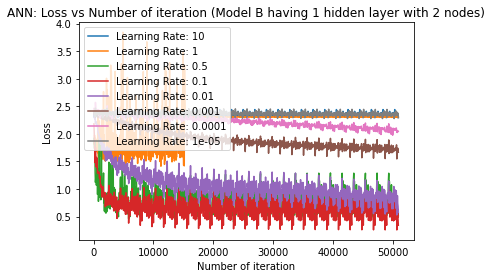

[9.961046188091263, 9.961046188091263, 64.6076794657763, 72.00890372843628, 66.83361157484697, 29.827490261547023, 23.20534223706177, 9.961046188091263]


In [ ]:
# Create ANN with 1 hidden layer with 2 nodes
hidden_dim = 2
ann_part_b_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_b = ANN_1_layer(input_dim, hidden_dim, output_dim)
    optimizer = torch.optim.SGD(model_b.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_b, optimizer, input_dim, train_loader, test_loader)
    plt.plot(iteration_list,loss_list)
    ann_part_b_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model B having 1 hidden layer with 2 nodes)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_b_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.3244457244873047  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685925006866455  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623857498168945  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 0.24455112218856812  Accuracy: 90.37284362826934 %  Learning Rate: 1
Iteration: 20000  Loss: 0.30185091495513916  Accuracy: 88.5920979410128 %  Learning Rate: 1
Iteration: 30000  Loss: 0.1472373604774475  Accuracy: 89.20422927100724 %  Learning Rate: 1
Iteration: 40000  Loss: 0.41122132539749146  Accuracy: 81.41346688925988 %  Learning Rate: 1
Iteration: 50000  Loss: 0.4560966491699219  Accuracy: 79.96661101836393 %  Learning Rate: 1

Iteration: 10000  Loss: 0.0022754997480660677  Accuracy: 92.209237618252

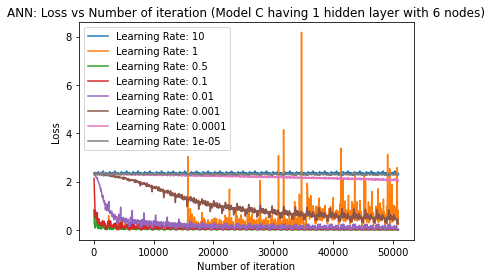

[9.961046188091263, 79.79966611018364, 92.32053422370618, 93.21090706733445, 93.09961046188091, 83.30550918196995, 40.40066777963272, 14.746800222593212]


In [ ]:
# Create ANN with 1 hidden layer with 6 nodes
hidden_dim = 6
ann_part_c_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_c = ANN_1_layer(input_dim, hidden_dim, output_dim)
    optimizer = torch.optim.SGD(model_c.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_c, optimizer, input_dim, train_loader, test_loader)
    plt.plot(iteration_list,loss_list)
    ann_part_c_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model C having 1 hidden layer with 6 nodes)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_c_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.324446201324463  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685922622680664  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 2.3030998706817627  Accuracy: 9.961046188091263 %  Learning Rate: 1
Iteration: 20000  Loss: 2.3021750450134277  Accuracy: 10.072342793544797 %  Learning Rate: 1
Iteration: 30000  Loss: 2.3086249828338623  Accuracy: 10.127991096271563 %  Learning Rate: 1
Iteration: 40000  Loss: 2.303781509399414  Accuracy: 10.18363939899833 %  Learning Rate: 1
Iteration: 50000  Loss: 2.3106729984283447  Accuracy: 10.072342793544797 %  Learning Rate: 1

Iteration: 10000  Loss: 0.4191461503505707  Accuracy: 67.33444629938786 %

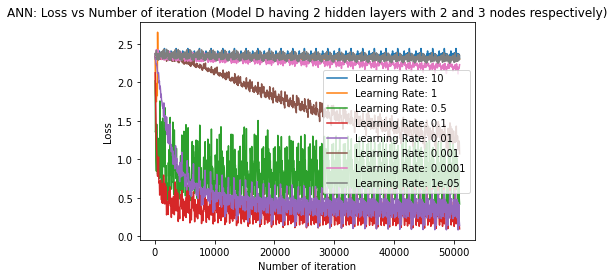

[9.961046188091263, 9.961046188091263, 66.7779632721202, 86.0879243183083, 84.75236505286588, 56.14913745130774, 22.982749026154703, 17.250973845297718]


In [ ]:
# Create ANN with 2 hidden layers with 2 and 3 nodes respectively
hidden_dims = [2, 3]
ann_part_d_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_d = ANN_2_layers(input_dim, hidden_dims, output_dim)
    optimizer = torch.optim.SGD(model_d.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_d, optimizer, input_dim, train_loader, test_loader)
    plt.plot(iteration_list,loss_list)
    ann_part_d_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model D having 2 hidden layers with 2 and 3 nodes respectively)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_d_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.3244457244873047  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685922622680664  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 2.3030998706817627  Accuracy: 9.961046188091263 %  Learning Rate: 1
Iteration: 20000  Loss: 2.3021750450134277  Accuracy: 10.072342793544797 %  Learning Rate: 1
Iteration: 30000  Loss: 2.3086249828338623  Accuracy: 10.127991096271563 %  Learning Rate: 1
Iteration: 40000  Loss: 2.303781509399414  Accuracy: 10.18363939899833 %  Learning Rate: 1
Iteration: 50000  Loss: 2.3106729984283447  Accuracy: 10.072342793544797 %  Learning Rate: 1

Iteration: 10000  Loss: 0.5244802236557007  Accuracy: 62.381747356705624

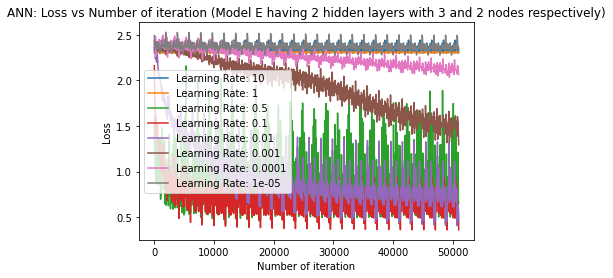

[9.961046188091263, 9.961046188091263, 61.82526432943795, 72.39844184752366, 71.50806900389539, 43.4613244296049, 21.758486366165833, 10.072342793544797]


In [ ]:
# Create ANN with 2 hidden layers with 3 and 2 nodes respectively
hidden_dims = [3, 2]
ann_part_e_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_e = ANN_2_layers(input_dim, hidden_dims, output_dim)
    optimizer = torch.optim.SGD(model_e.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_e, optimizer, input_dim, train_loader, test_loader)
    plt.plot(iteration_list,loss_list)
    ann_part_e_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model E having 2 hidden layers with 3 and 2 nodes respectively)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_e_accuracy)

## (3) Plotting Graphs

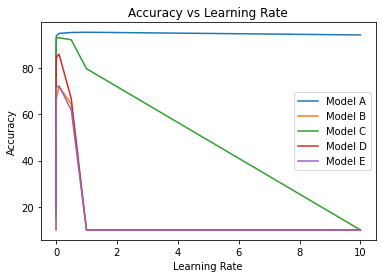

In [ ]:
# Accuracy vs Learning Rate for each model

plt.plot(learning_rates, ann_part_a_accuracy)
plt.plot(learning_rates, ann_part_b_accuracy)
plt.plot(learning_rates, ann_part_c_accuracy)
plt.plot(learning_rates, ann_part_d_accuracy)
plt.plot(learning_rates, ann_part_e_accuracy)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Learning Rate")
plt.legend(['Model A', 'Model B', 'Model C', 'Model D', 'Model E'])
plt.show()

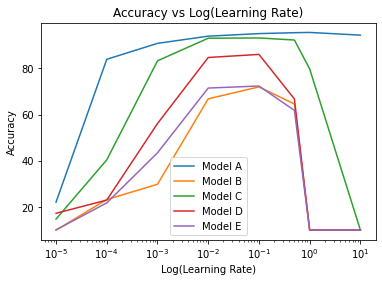

In [ ]:
# Accuracy vs Log Learning Rate for each model

plt.plot(learning_rates, ann_part_a_accuracy)
plt.plot(learning_rates, ann_part_b_accuracy)
plt.plot(learning_rates, ann_part_c_accuracy)
plt.plot(learning_rates, ann_part_d_accuracy)
plt.plot(learning_rates, ann_part_e_accuracy)
plt.xscale("log")
plt.xlabel('Log(Learning Rate)')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Log(Learning Rate)")
plt.legend(['Model A', 'Model B', 'Model C', 'Model D', 'Model E'])
plt.show()

In [ ]:
# Creating lists for plotting accuracy vs model for each learning rate
lr_10 = [ann_part_a_accuracy[0], ann_part_b_accuracy[0], ann_part_c_accuracy[0], ann_part_d_accuracy[0], ann_part_e_accuracy[0]]
lr_1 = [ann_part_a_accuracy[1], ann_part_b_accuracy[1], ann_part_c_accuracy[1], ann_part_d_accuracy[1], ann_part_e_accuracy[1]]
lr_by2 = [ann_part_a_accuracy[2], ann_part_b_accuracy[2], ann_part_c_accuracy[2], ann_part_d_accuracy[2], ann_part_e_accuracy[2]]
lr_by10 = [ann_part_a_accuracy[3], ann_part_b_accuracy[3], ann_part_c_accuracy[3], ann_part_d_accuracy[3], ann_part_e_accuracy[3]]
lr_by100 = [ann_part_a_accuracy[4], ann_part_b_accuracy[4], ann_part_c_accuracy[4], ann_part_d_accuracy[4], ann_part_e_accuracy[4]]
lr_by1000 = [ann_part_a_accuracy[5], ann_part_b_accuracy[5], ann_part_c_accuracy[5], ann_part_d_accuracy[5], ann_part_e_accuracy[5]]
lr_by10000 = [ann_part_a_accuracy[6], ann_part_b_accuracy[6], ann_part_c_accuracy[6], ann_part_d_accuracy[6], ann_part_e_accuracy[6]]
lr_by100000 = [ann_part_a_accuracy[7], ann_part_b_accuracy[7], ann_part_c_accuracy[7], ann_part_d_accuracy[7], ann_part_e_accuracy[7]]

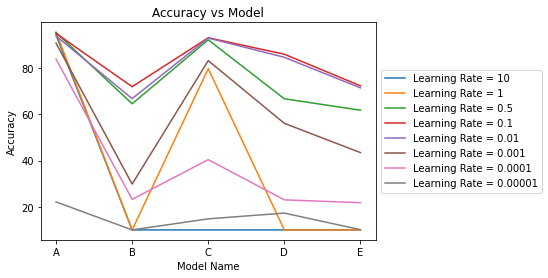

In [ ]:
model_names = ['A', 'B', 'C', 'D', 'E']

# Accuracy vs Model for each learning rate
plt.plot(model_names, lr_10)
plt.plot(model_names, lr_1)
plt.plot(model_names, lr_by2)
plt.plot(model_names, lr_by10)
plt.plot(model_names, lr_by100)
plt.plot(model_names, lr_by1000)
plt.plot(model_names, lr_by10000)
plt.plot(model_names, lr_by100000)
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Model")
plt.legend(['Learning Rate = 10',
            'Learning Rate = 1',
            'Learning Rate = 0.5',
            'Learning Rate = 0.1',
            'Learning Rate = 0.01',
            'Learning Rate = 0.001',
            'Learning Rate = 0.0001',
            'Learning Rate = 0.00001'],
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#(4) Choosing Best Model

In [ ]:
# From the above graphs, we know that Model A performs the best
# We choose a learning rate of 0.1 (even though it is not the best for the model A), because it is the best for all the other models and 
# performs very well on model A too
# Thus, the best architecture would be a neural network with 0 hidden layers.
# It should have a learning rate of 0.1, input dimension of 8*8 = 64 and an output dimension of 10

# Using the best learning rate on all models

In [ ]:
learning_rate = 0.1

Iteration: 10000  Loss: 0.023526420816779137  Accuracy: 94.49081803005008 %  Learning Rate: 0.1
Iteration: 20000  Loss: 0.08785159140825272  Accuracy: 94.99165275459099 %  Learning Rate: 0.1
Iteration: 30000  Loss: 0.05967530608177185  Accuracy: 95.04730105731775 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.04687271639704704  Accuracy: 94.93600445186422 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.07430452853441238  Accuracy: 95.04730105731775 %  Learning Rate: 0.1


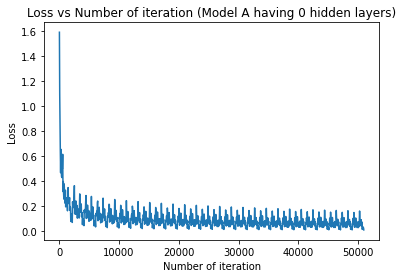

In [ ]:
# Create ANN with 0 hidden layers (the best model)
model_a = ANN_0_layers(input_dim, output_dim)
optimizer = torch.optim.SGD(model_a.parameters(), lr=learning_rate)
y_pred_a, iteration_list_a, loss_list_a, accuracy_list_a = train_model(model_a, optimizer, input_dim, train_loader, test_loader)
plt.plot(iteration_list_a,loss_list_a)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (Model A having 0 hidden layers)")
plt.show()

Iteration: 10000  Loss: 0.4036138653755188  Accuracy: 72.12020033388981 %  Learning Rate: 0.1
Iteration: 20000  Loss: 0.8027547597885132  Accuracy: 71.34112409571507 %  Learning Rate: 0.1
Iteration: 30000  Loss: 0.7507555484771729  Accuracy: 72.39844184752366 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.5732117295265198  Accuracy: 71.73066221480245 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.6043975353240967  Accuracy: 72.95492487479132 %  Learning Rate: 0.1


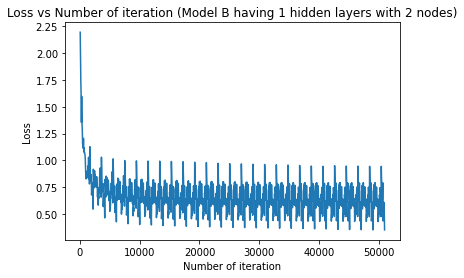

In [ ]:
# Create ANN with 1 hidden layer with 2 nodes
model_b = ANN_1_layer(input_dim, 2, output_dim)
optimizer = torch.optim.SGD(model_b.parameters(), lr=learning_rate)
y_pred_b, iteration_list_b, loss_list_b, accuracy_list_b = train_model(model_b, optimizer, input_dim, train_loader, test_loader)
plt.plot(iteration_list_b,loss_list_b)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (Model B having 1 hidden layers with 2 nodes)")
plt.show()

Iteration: 10000  Loss: 0.0068630618043243885  Accuracy: 92.76572064552032 %  Learning Rate: 0.1
Iteration: 20000  Loss: 0.07500564306974411  Accuracy: 92.26488592097941 %  Learning Rate: 0.1
Iteration: 30000  Loss: 0.07279469072818756  Accuracy: 91.76405119643852 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.044623181223869324  Accuracy: 92.15358931552588 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.1457597315311432  Accuracy: 91.76405119643852 %  Learning Rate: 0.1


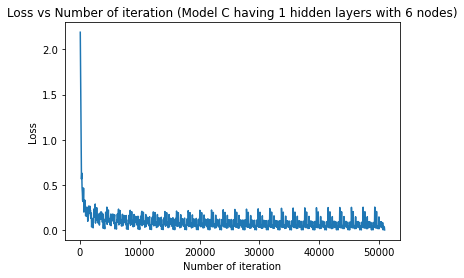

In [ ]:
# Create ANN with 1 hidden layer with 6 nodes
model_c = ANN_1_layer(input_dim, 6, output_dim)
optimizer = torch.optim.SGD(model_c.parameters(), lr=learning_rate)
y_pred_c, iteration_list_c, loss_list_c, accuracy_list_c = train_model(model_c, optimizer, input_dim, train_loader, test_loader)
plt.plot(iteration_list_c,loss_list_c)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (Model C having 1 hidden layers with 6 nodes)")
plt.show()

Iteration: 10000  Loss: 0.4592301845550537  Accuracy: 66.05453533667223 %  Learning Rate: 0.1
Iteration: 20000  Loss: 0.7718293070793152  Accuracy: 68.2804674457429 %  Learning Rate: 0.1
Iteration: 30000  Loss: 0.6197099089622498  Accuracy: 72.23149693934334 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.6944537162780762  Accuracy: 71.22982749026154 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.800180196762085  Accuracy: 72.62103505843072 %  Learning Rate: 0.1


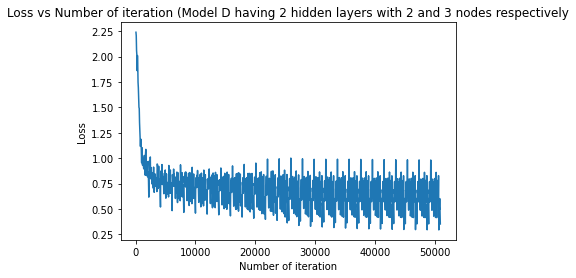

In [ ]:
# Create ANN with 2 hidden layers with 2 and 3 nodes respectively
model_d = ANN_2_layers(input_dim, [2, 3], output_dim)
optimizer = torch.optim.SGD(model_d.parameters(), lr=learning_rate)
y_pred_d, iteration_list_d, loss_list_d, accuracy_list_d = train_model(model_d, optimizer, input_dim, train_loader, test_loader)
plt.plot(iteration_list_d,loss_list_d)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (Model D having 2 hidden layers with 2 and 3 nodes respectively")
plt.show()

Iteration: 10000  Loss: 0.47213077545166016  Accuracy: 71.56371730662215 %  Learning Rate: 0.1
Iteration: 20000  Loss: 0.7300142049789429  Accuracy: 70.89593767390095 %  Learning Rate: 0.1
Iteration: 30000  Loss: 0.6266964077949524  Accuracy: 72.34279354479689 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.6421209573745728  Accuracy: 71.73066221480245 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.652271032333374  Accuracy: 72.62103505843072 %  Learning Rate: 0.1


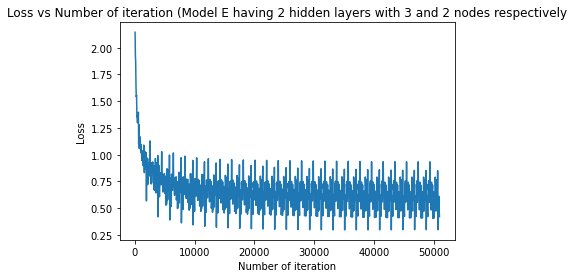

In [ ]:
# Create ANN with 2 hidden layers with 3 and 2 nodes respectively
model_e = ANN_2_layers(input_dim, [3, 2], output_dim)
optimizer = torch.optim.SGD(model_e.parameters(), lr=learning_rate)
y_pred_e, iteration_list_e, loss_list_e, accuracy_list_e = train_model(model_e, optimizer, input_dim, train_loader, test_loader)
plt.plot(iteration_list_e,loss_list_e)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration (Model E having 2 hidden layers with 3 and 2 nodes respectively")
plt.show()

# (5) PCA

In [ ]:
from sklearn.decomposition import PCA

# Instantiating PCA for giving 2 columns in the reduced dataset
pca = PCA(n_components=2)

# Transforming the dataset, using PCA
X_PCA_train = pca.fit_transform(X_train)
X_PCA_test = pca.transform(X_test)

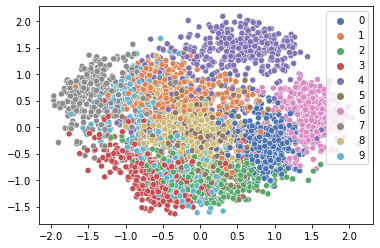

In [ ]:
# Plotting the train dataset, with all data points of a single class having the same color 
# and data points from different classes having different colors.
sns.scatterplot(x = X_PCA_train[:, 0], y = X_PCA_train[:, 1], hue = y_train, palette="deep")

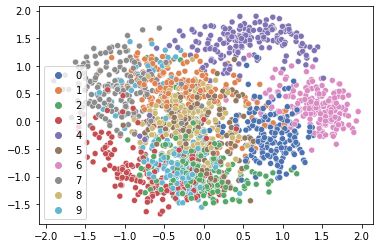

In [ ]:
# Plotting the test dataset, with all data points of a single class having the same color 
# and data points from different classes having different colors.
sns.scatterplot(x = X_PCA_test[:, 0], y = X_PCA_test[:, 1], hue = y_test, palette="deep")

# (6) Implementing the model after applying PCA

In [ ]:
learning_rate = 0.1 # (Best learning rate obtained from step 3)
input_dim = 2

X_train_PCA = torch.from_numpy(X_PCA_train).float()
X_test_PCA = torch.from_numpy(X_PCA_test).float()

# batch_size
batch_size = 100

n_iters = 50000
num_epochs = n_iters / (len(X_train_PCA) / batch_size)
num_epochs = int(num_epochs)

In [ ]:
# Pytorch train and test sets
train_PCA = torch.utils.data.TensorDataset(X_train_PCA, y_train)
test_PCA = torch.utils.data.TensorDataset(X_test_PCA, y_test)

# data loader
train_loader_PCA = torch.utils.data.DataLoader(train_PCA, batch_size = batch_size, shuffle = False)
test_loader_PCA = torch.utils.data.DataLoader(test_PCA, batch_size = batch_size, shuffle = False)

In [ ]:
from sklearn.metrics import classification_report

## Model A

Iteration: 10000  Loss: 0.7124194502830505  Accuracy: 58.20812465219811 %  Learning Rate: 0.1
Iteration: 20000  Loss: 1.2221059799194336  Accuracy: 58.09682804674458 %  Learning Rate: 0.1
Iteration: 30000  Loss: 1.1321382522583008  Accuracy: 57.874234835837505 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.8535850048065186  Accuracy: 58.15247634947134 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.974286675453186  Accuracy: 58.09682804674458 %  Learning Rate: 0.1


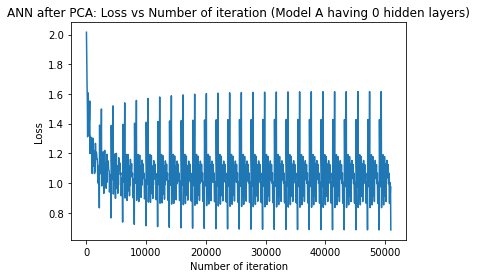

In [ ]:
# Create ANN with 0 hidden layers (the best model) with reduced features (AFTER PCA)
model_a_PCA = ANN_0_layers(input_dim, output_dim)
optimizer = torch.optim.SGD(model_a_PCA.parameters(), lr=learning_rate)
y_pred_a_PCA, iteration_list_a_PCA, loss_list_a_PCA, accuracy_list_a_PCA = train_model(model_a_PCA, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
plt.plot(iteration_list_a_PCA,loss_list_a_PCA)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN after PCA: Loss vs Number of iteration (Model A having 0 hidden layers)")
plt.show()

In [ ]:
# Printing Classification Reports
print("Before PCA")
print(classification_report(y_test, y_pred_a))
print("After PCA")
print(classification_report(y_test, y_pred_a_PCA))

Before PCA
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.91      0.96      0.93       182
           2       0.97      0.97      0.97       177
           3       0.99      0.91      0.95       183
           4       0.96      0.97      0.96       181
           5       0.92      0.97      0.94       182
           6       0.99      0.98      0.98       181
           7       0.98      0.91      0.94       179
           8       0.92      0.90      0.91       174
           9       0.89      0.94      0.91       180

    accuracy                           0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.95      0.95      0.95      1797

After PCA
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       178
           1       0.47      0.70      0.56       182
           2       0.45      0.56      0.50       177
   

## Model B

Iteration: 10000  Loss: 0.752154529094696  Accuracy: 57.206455203116306 %  Learning Rate: 0.1
Iteration: 20000  Loss: 1.2466912269592285  Accuracy: 58.37506956037841 %  Learning Rate: 0.1
Iteration: 30000  Loss: 1.1442832946777344  Accuracy: 57.42904841402337 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.858733594417572  Accuracy: 57.81858653311074 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.9660331606864929  Accuracy: 58.48636616583194 %  Learning Rate: 0.1


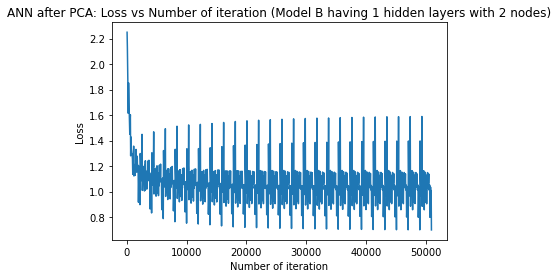

In [ ]:
# Create ANN with 1 hidden layer with 2 nodes with reduced features (after PCA)
model_b_PCA = ANN_1_layer(input_dim, 2, output_dim)
optimizer = torch.optim.SGD(model_b_PCA.parameters(), lr=learning_rate)
y_pred_b_PCA, iteration_list_b_PCA, loss_list_b_PCA, accuracy_list_b_PCA = train_model(model_b_PCA, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
plt.plot(iteration_list_b_PCA,loss_list_b_PCA)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN after PCA: Loss vs Number of iteration (Model B having 1 hidden layers with 2 nodes)")
plt.show()

In [ ]:
# Printing Classification Reports
print("Before PCA")
print(classification_report(y_test, y_pred_b))
print("After PCA")
print(classification_report(y_test, y_pred_b_PCA))

Before PCA
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       178
           1       0.47      0.47      0.47       182
           2       0.86      0.85      0.85       177
           3       0.88      0.80      0.84       183
           4       0.89      0.94      0.92       181
           5       0.60      0.50      0.54       182
           6       0.86      0.84      0.85       181
           7       0.96      0.74      0.84       179
           8       0.59      0.58      0.59       174
           9       0.50      0.73      0.60       180

    accuracy                           0.72      1797
   macro avg       0.74      0.72      0.73      1797
weighted avg       0.74      0.72      0.73      1797

After PCA
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       178
           1       0.45      0.69      0.54       182
           2       0.44      0.59      0.51       177
   

## Model C

Iteration: 10000  Loss: 0.6704651117324829  Accuracy: 58.98720089037285 %  Learning Rate: 0.1
Iteration: 20000  Loss: 1.2563239336013794  Accuracy: 59.09849749582638 %  Learning Rate: 0.1
Iteration: 30000  Loss: 1.0105438232421875  Accuracy: 58.931552587646074 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.8447433710098267  Accuracy: 59.98887033945465 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.907724916934967  Accuracy: 60.37840845854201 %  Learning Rate: 0.1


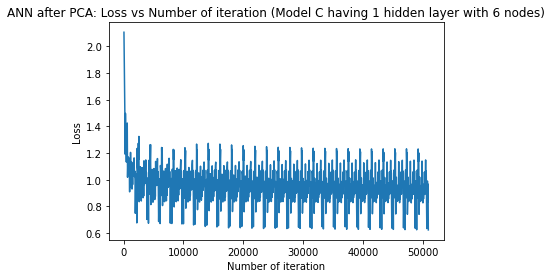

In [ ]:
# Create ANN with 1 hidden layer with 6 nodes with reduced features (after PCA)
model_c_PCA = ANN_1_layer(input_dim, 6, output_dim)
optimizer = torch.optim.SGD(model_c_PCA.parameters(), lr=learning_rate)
y_pred_c_PCA, iteration_list_c_PCA, loss_list_c_PCA, accuracy_list_c_PCA = train_model(model_c_PCA, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
plt.plot(iteration_list_c_PCA,loss_list_c_PCA)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN after PCA: Loss vs Number of iteration (Model C having 1 hidden layer with 6 nodes)")
plt.show()

In [ ]:
# Printing Classification Reports
print("Before PCA")
print(classification_report(y_test, y_pred_c))
print("After PCA")
print(classification_report(y_test, y_pred_c_PCA))

Before PCA
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       178
           1       0.88      0.93      0.90       182
           2       0.92      0.94      0.93       177
           3       0.95      0.91      0.93       183
           4       0.95      0.98      0.96       181
           5       0.92      0.95      0.93       182
           6       0.94      0.94      0.94       181
           7       0.99      0.85      0.92       179
           8       0.88      0.82      0.85       174
           9       0.82      0.92      0.87       180

    accuracy                           0.92      1797
   macro avg       0.92      0.92      0.92      1797
weighted avg       0.92      0.92      0.92      1797

After PCA
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       178
           1       0.48      0.71      0.58       182
           2       0.45      0.51      0.48       177
   

## Model D

Iteration: 10000  Loss: 0.73491370677948  Accuracy: 59.04284919309961 %  Learning Rate: 0.1
Iteration: 20000  Loss: 1.3281478881835938  Accuracy: 60.26711185308848 %  Learning Rate: 0.1
Iteration: 30000  Loss: 1.1471877098083496  Accuracy: 59.821925431274344 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.8300098180770874  Accuracy: 59.48803561491375 %  Learning Rate: 0.1
Iteration: 50000  Loss: 0.9234418272972107  Accuracy: 60.60100166944908 %  Learning Rate: 0.1


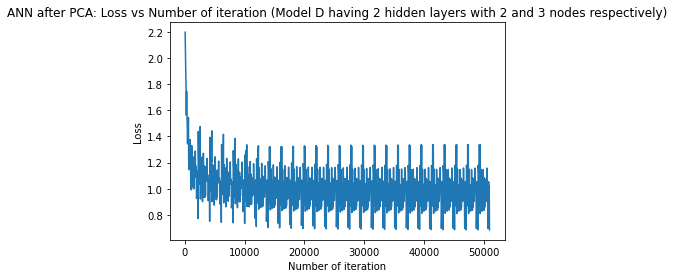

In [ ]:
# Create ANN with 2 hidden layers with 2 and 3 nodes respectively with reduced features (after PCA)
model_d_PCA = ANN_2_layers(input_dim, [2, 3], output_dim)
optimizer = torch.optim.SGD(model_d_PCA.parameters(), lr=learning_rate)
y_pred_d_PCA, iteration_list_d_PCA, loss_list_d_PCA, accuracy_list_d_PCA = train_model(model_d_PCA, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
plt.plot(iteration_list_d_PCA,loss_list_d_PCA)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN after PCA: Loss vs Number of iteration (Model D having 2 hidden layers with 2 and 3 nodes respectively)")
plt.show()

In [ ]:
# Printing Classification Reports
print("Before PCA")
print(classification_report(y_test, y_pred_d))
print("After PCA")
print(classification_report(y_test, y_pred_d_PCA))

Before PCA
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       178
           1       0.60      0.54      0.57       182
           2       0.80      0.80      0.80       177
           3       0.80      0.82      0.81       183
           4       0.78      0.82      0.80       181
           5       0.65      0.54      0.59       182
           6       0.82      0.86      0.84       181
           7       0.88      0.70      0.78       179
           8       0.51      0.57      0.54       174
           9       0.53      0.69      0.60       180

    accuracy                           0.72      1797
   macro avg       0.73      0.72      0.72      1797
weighted avg       0.73      0.72      0.72      1797

After PCA
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       178
           1       0.46      0.71      0.56       182
           2       0.44      0.61      0.51       177
   

## Model E

Iteration: 10000  Loss: 0.7513734698295593  Accuracy: 59.26544240400668 %  Learning Rate: 0.1
Iteration: 20000  Loss: 1.283753514289856  Accuracy: 58.931552587646074 %  Learning Rate: 0.1
Iteration: 30000  Loss: 1.1498507261276245  Accuracy: 57.81858653311074 %  Learning Rate: 0.1
Iteration: 40000  Loss: 0.8469554781913757  Accuracy: 58.31942125765164 %  Learning Rate: 0.1
Iteration: 50000  Loss: 1.0050350427627563  Accuracy: 59.154145798553145 %  Learning Rate: 0.1


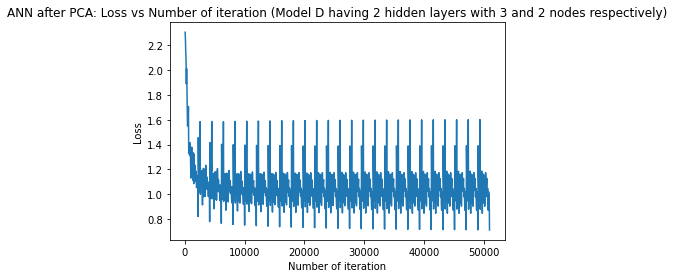

In [ ]:
# Create ANN with 2 hidden layers with 3 and 2 nodes respectively with reduced features (after PCA)
model_e_PCA = ANN_2_layers(input_dim, [3, 2], output_dim)
optimizer = torch.optim.SGD(model_e_PCA.parameters(), lr=learning_rate)
y_pred_e_PCA, iteration_list_e_PCA, loss_list_e_PCA, accuracy_list_e_PCA = train_model(model_e_PCA, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
plt.plot(iteration_list_e_PCA,loss_list_e_PCA)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN after PCA: Loss vs Number of iteration (Model D having 2 hidden layers with 3 and 2 nodes respectively)")
plt.show()

In [ ]:
# Printing Classification Reports
print("Before PCA")
print(classification_report(y_test, y_pred_e))
print("After PCA")
print(classification_report(y_test, y_pred_e_PCA))

Before PCA
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       178
           1       0.64      0.57      0.60       182
           2       0.82      0.84      0.83       177
           3       0.90      0.79      0.84       183
           4       0.82      0.91      0.86       181
           5       0.58      0.58      0.58       182
           6       0.83      0.88      0.86       181
           7       0.91      0.75      0.83       179
           8       0.52      0.57      0.55       174
           9       0.52      0.61      0.56       180

    accuracy                           0.73      1797
   macro avg       0.74      0.73      0.73      1797
weighted avg       0.74      0.73      0.73      1797

After PCA
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       178
           1       0.46      0.66      0.55       182
           2       0.44      0.59      0.50       177
   

# Using all the learning rates on the dataset after PCA

Iteration: 10000  Loss: 0.8633325695991516  Accuracy: 56.92821368948247 %  Learning Rate: 10
Iteration: 20000  Loss: 1.430770993232727  Accuracy: 54.535336672231495 %  Learning Rate: 10
Iteration: 30000  Loss: 1.2548948526382446  Accuracy: 58.20812465219811 %  Learning Rate: 10
Iteration: 40000  Loss: 0.897520899772644  Accuracy: 56.42737896494157 %  Learning Rate: 10
Iteration: 50000  Loss: 1.2738767862319946  Accuracy: 55.815247634947134 %  Learning Rate: 10

Iteration: 10000  Loss: 0.6836302876472473  Accuracy: 58.263772954924875 %  Learning Rate: 1
Iteration: 20000  Loss: 1.2467879056930542  Accuracy: 58.20812465219811 %  Learning Rate: 1
Iteration: 30000  Loss: 1.146183729171753  Accuracy: 57.70728992765721 %  Learning Rate: 1
Iteration: 40000  Loss: 0.8491812944412231  Accuracy: 57.65164162493044 %  Learning Rate: 1
Iteration: 50000  Loss: 0.983479917049408  Accuracy: 58.653311074012244 %  Learning Rate: 1

Iteration: 10000  Loss: 0.6840856075286865  Accuracy: 58.31942125765164 %

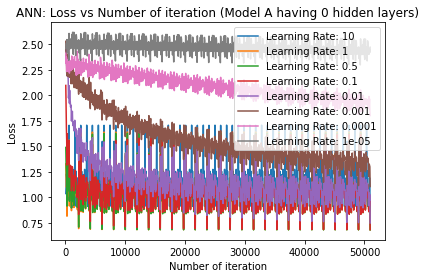

[56.92821368948247, 58.31942125765164, 58.37506956037841, 58.04117974401781, 58.54201446855871, 52.81023928770173, 34.83583750695604, 10.684474123539232]


In [ ]:
# Create ANN with 0 hidden layers
ann_part_a_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_a = ANN_0_layers(input_dim, output_dim)
    optimizer = torch.optim.SGD(model_a.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_a, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
    plt.plot(iteration_list,loss_list)
    ann_part_a_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model A having 0 hidden layers)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_a_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.3244457244873047  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685925006866455  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 0.7133263945579529  Accuracy: 56.81691708402894 %  Learning Rate: 1
Iteration: 20000  Loss: 1.3277347087860107  Accuracy: 53.31107401224263 %  Learning Rate: 1
Iteration: 30000  Loss: 1.3800526857376099  Accuracy: 55.5370061213133 %  Learning Rate: 1
Iteration: 40000  Loss: 0.9383127093315125  Accuracy: 57.65164162493044 %  Learning Rate: 1
Iteration: 50000  Loss: 1.0994209051132202  Accuracy: 54.8692264885921 %  Learning Rate: 1

Iteration: 10000  Loss: 0.7652735710144043  Accuracy: 58.70895937673901 %  L

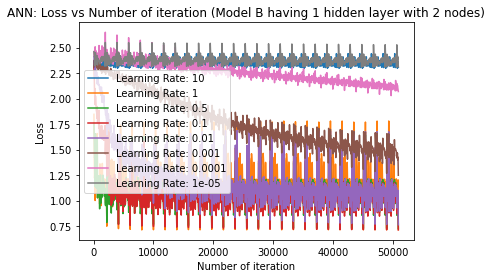

[9.961046188091263, 56.81691708402894, 58.37506956037841, 58.98720089037285, 57.42904841402337, 48.85920979410128, 18.97607122982749, 10.795770728992766]


In [ ]:
# Create ANN with 1 hidden layer with 2 nodes
hidden_dim = 2
ann_part_b_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_b = ANN_1_layer(input_dim, hidden_dim, output_dim)
    optimizer = torch.optim.SGD(model_b.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_b, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
    plt.plot(iteration_list,loss_list)
    ann_part_b_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model B having 1 hidden layer with 2 nodes)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_b_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.324445962905884  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685922622680664  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623852729797363  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 0.7358648180961609  Accuracy: 59.432387312186975 %  Learning Rate: 1
Iteration: 20000  Loss: 1.2507565021514893  Accuracy: 57.484696716750136 %  Learning Rate: 1
Iteration: 30000  Loss: 1.0219008922576904  Accuracy: 58.37506956037841 %  Learning Rate: 1
Iteration: 40000  Loss: 0.803677499294281  Accuracy: 58.653311074012244 %  Learning Rate: 1
Iteration: 50000  Loss: 1.0479483604431152  Accuracy: 58.82025598219254 %  Learning Rate: 1

Iteration: 10000  Loss: 0.6985958218574524  Accuracy: 59.59933222036728 %

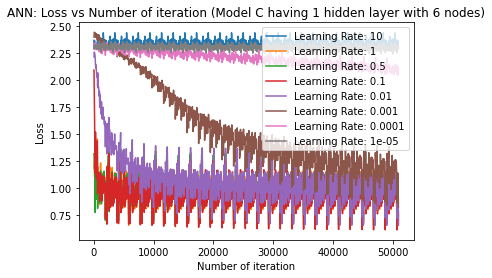

[9.961046188091263, 58.87590428491931, 59.432387312186975, 59.654980523094046, 60.60100166944908, 55.370061213133, 25.598219254312742, 15.080690038953811]


In [ ]:
# Create ANN with 1 hidden layer with 6 nodes
hidden_dim = 6
ann_part_c_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_c = ANN_1_layer(input_dim, hidden_dim, output_dim)
    optimizer = torch.optim.SGD(model_c.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_c, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
    plt.plot(iteration_list,loss_list)
    ann_part_c_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model C having 1 hidden layer with 6 nodes)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_c_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.3244457244873047  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685925006866455  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 0.7215548753738403  Accuracy: 57.373400111296604 %  Learning Rate: 1
Iteration: 20000  Loss: 1.358596920967102  Accuracy: 54.257095158597664 %  Learning Rate: 1
Iteration: 30000  Loss: 1.3055909872055054  Accuracy: 55.036171396772396 %  Learning Rate: 1
Iteration: 40000  Loss: 0.8139967918395996  Accuracy: 54.98052309404563 %  Learning Rate: 1
Iteration: 50000  Loss: 1.1068263053894043  Accuracy: 58.263772954924875 %  Learning Rate: 1

Iteration: 10000  Loss: 0.7689750790596008  Accuracy: 58.59766277128548

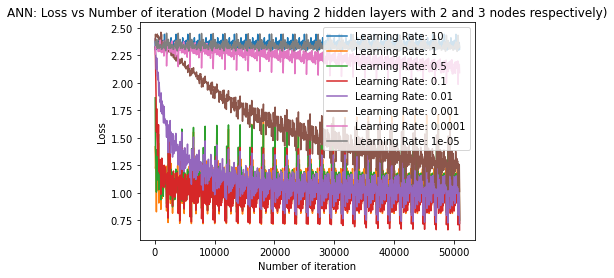

[9.961046188091263, 57.76293823038397, 57.874234835837505, 61.26878130217028, 59.09849749582638, 49.97217584863662, 24.318308291597106, 2.949360044518642]


In [ ]:
# Create ANN with 2 hidden layers with 2 and 3 nodes respectively
hidden_dims = [2, 3]
ann_part_d_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_d = ANN_2_layers(input_dim, hidden_dims, output_dim)
    optimizer = torch.optim.SGD(model_d.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_d, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
    plt.plot(iteration_list,loss_list)
    ann_part_d_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model D having 2 hidden layers with 2 and 3 nodes respectively)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_d_accuracy)

Iteration: 10000  Loss: 2.3068981170654297  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 20000  Loss: 2.3244457244873047  Accuracy: 9.961046188091263 %  Learning Rate: 10
Iteration: 30000  Loss: 2.409038782119751  Accuracy: 9.905397885364497 %  Learning Rate: 10
Iteration: 40000  Loss: 2.3685922622680664  Accuracy: 10.072342793544797 %  Learning Rate: 10
Iteration: 50000  Loss: 2.3623855113983154  Accuracy: 9.84974958263773 %  Learning Rate: 10

Iteration: 10000  Loss: 0.8040390610694885  Accuracy: 57.095158597662774 %  Learning Rate: 1
Iteration: 20000  Loss: 1.442184329032898  Accuracy: 48.41402337228715 %  Learning Rate: 1
Iteration: 30000  Loss: 1.527930736541748  Accuracy: 48.191430161380076 %  Learning Rate: 1
Iteration: 40000  Loss: 0.8906797170639038  Accuracy: 55.370061213133 %  Learning Rate: 1
Iteration: 50000  Loss: 1.1945829391479492  Accuracy: 55.59265442404007 %  Learning Rate: 1

Iteration: 10000  Loss: 0.7574746608734131  Accuracy: 57.92988313856427 %  L

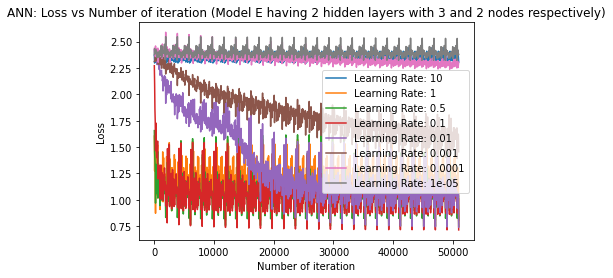

[9.961046188091263, 56.983861992209235, 57.874234835837505, 58.31942125765164, 58.20812465219811, 40.23372287145242, 13.132999443516972, 9.84974958263773]


In [ ]:
# Create ANN with 2 hidden layers with 3 and 2 nodes respectively
hidden_dims = [3, 2]
ann_part_e_accuracy = []

# Iterate for all the learning rates given
for learning_rate in learning_rates:
    model_e = ANN_2_layers(input_dim, hidden_dims, output_dim)
    optimizer = torch.optim.SGD(model_e.parameters(), lr=learning_rate)
    y_pred, iteration_list, loss_list, accuracy_list = train_model(model_e, optimizer, input_dim, train_loader_PCA, test_loader_PCA)
    plt.plot(iteration_list,loss_list)
    ann_part_e_accuracy.append(accuracy_list[-1])
    print()
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration (Model E having 2 hidden layers with 3 and 2 nodes respectively)")
plt.legend(["Learning Rate: " + str(i) for i in learning_rates])
plt.show()
print(ann_part_e_accuracy)

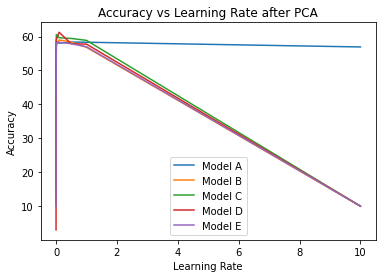

In [ ]:
# Accuracy vs Learning Rate for each model after PCA

plt.plot(learning_rates, ann_part_a_accuracy)
plt.plot(learning_rates, ann_part_b_accuracy)
plt.plot(learning_rates, ann_part_c_accuracy)
plt.plot(learning_rates, ann_part_d_accuracy)
plt.plot(learning_rates, ann_part_e_accuracy)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Learning Rate after PCA")
plt.legend(['Model A', 'Model B', 'Model C', 'Model D', 'Model E'])
plt.show()

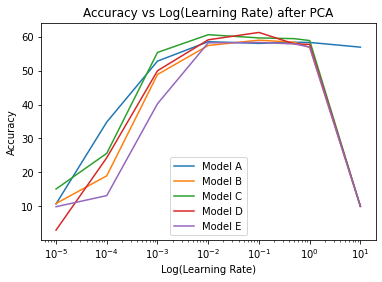

In [ ]:
# Accuracy vs Log Learning Rate for each model PCA

plt.plot(learning_rates, ann_part_a_accuracy)
plt.plot(learning_rates, ann_part_b_accuracy)
plt.plot(learning_rates, ann_part_c_accuracy)
plt.plot(learning_rates, ann_part_d_accuracy)
plt.plot(learning_rates, ann_part_e_accuracy)
plt.xscale("log")
plt.xlabel('Log(Learning Rate)')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Log(Learning Rate) after PCA")
plt.legend(['Model A', 'Model B', 'Model C', 'Model D', 'Model E'])
plt.show()

In [ ]:
# Creating lists for plotting accuracy vs model for each learning rate
lr_10 = [ann_part_a_accuracy[0], ann_part_b_accuracy[0], ann_part_c_accuracy[0], ann_part_d_accuracy[0], ann_part_e_accuracy[0]]
lr_1 = [ann_part_a_accuracy[1], ann_part_b_accuracy[1], ann_part_c_accuracy[1], ann_part_d_accuracy[1], ann_part_e_accuracy[1]]
lr_by2 = [ann_part_a_accuracy[2], ann_part_b_accuracy[2], ann_part_c_accuracy[2], ann_part_d_accuracy[2], ann_part_e_accuracy[2]]
lr_by10 = [ann_part_a_accuracy[3], ann_part_b_accuracy[3], ann_part_c_accuracy[3], ann_part_d_accuracy[3], ann_part_e_accuracy[3]]
lr_by100 = [ann_part_a_accuracy[4], ann_part_b_accuracy[4], ann_part_c_accuracy[4], ann_part_d_accuracy[4], ann_part_e_accuracy[4]]
lr_by1000 = [ann_part_a_accuracy[5], ann_part_b_accuracy[5], ann_part_c_accuracy[5], ann_part_d_accuracy[5], ann_part_e_accuracy[5]]
lr_by10000 = [ann_part_a_accuracy[6], ann_part_b_accuracy[6], ann_part_c_accuracy[6], ann_part_d_accuracy[6], ann_part_e_accuracy[6]]
lr_by100000 = [ann_part_a_accuracy[7], ann_part_b_accuracy[7], ann_part_c_accuracy[7], ann_part_d_accuracy[7], ann_part_e_accuracy[7]]

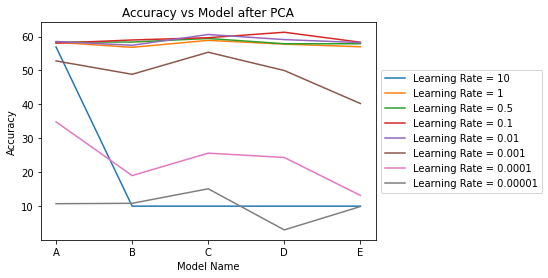

In [ ]:
model_names = ['A', 'B', 'C', 'D', 'E']

# Accuracy vs Model for each learning rate after PCA
plt.plot(model_names, lr_10)
plt.plot(model_names, lr_1)
plt.plot(model_names, lr_by2)
plt.plot(model_names, lr_by10)
plt.plot(model_names, lr_by100)
plt.plot(model_names, lr_by1000)
plt.plot(model_names, lr_by10000)
plt.plot(model_names, lr_by100000)
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Model after PCA")
plt.legend(['Learning Rate = 10',
            'Learning Rate = 1',
            'Learning Rate = 0.5',
            'Learning Rate = 0.1',
            'Learning Rate = 0.01',
            'Learning Rate = 0.001',
            'Learning Rate = 0.0001',
            'Learning Rate = 0.00001'],
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()